# Analysis of Yelp Business Intelligence Data

# Installation and Initial Setup

In [1]:
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("seaborn==0.10.0")
sc.install_pypi_package("numpy==1.18.4")
sc.install_pypi_package("pyspark==2.4.5")
sc.install_pypi_package("ipython==7.14.0")
sc.install_pypi_package("subprocess.run==0.0.8")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1588749333705_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)

  Using cached seaborn-0.10.0-py3-none-any.whl (215 kB)
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)

  Using cached numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl (20.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Not uninstalling numpy at /usr/local/lib64/python3.6/site-packages, outside environment /tmp/1589406452357-0
    Can't uninstall 'numpy'. No files were found to uninstall.

Processing /mnt/var/lib/livy/.cache/pip/wheels/84/30/e3/c51c5cd0229631e662d29d7b578a3e5949a4c8db033ffb70aa/pyspark-2.4.5-py2.py3-none-any.whl


# Importing

In [2]:
from IPython import display 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from pyspark import *

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
absl-py                    0.8.1
astor                      0.8.0
backcall                   0.1.0
beautifulsoup4             4.8.1
bleach                     3.1.0
boto                       2.49.0
cycler                     0.10.0
decorator                  4.4.2
funcsigs                   1.0.2
gast                       0.3.2
google-pasta               0.1.7
grpcio                     1.24.3
html5lib                   1.0.1
ipython                    7.14.0
ipython-genutils           0.2.0
jedi                       0.17.0
jmespath                   0.9.4
Keras-Applications         1.0.6
Keras-Preprocessing        1.0.5
kiwisolver                 1.2.0
lxml                       4.4.2
Markdown                   3.1.1
matplotlib                 3.2.1
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.18.4
pandas                     1.0.3


# Loading Data

In [4]:
business = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_business.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

In [5]:
iv = {'columns': len(business.columns), 'rows': business.count()}
print(f"Columns:{iv['columns']} | Rows:{iv['rows']}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns:14 | Rows:209393

In [6]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [8]:
business.createOrReplaceTempView("biz")
biz = spark.sql(""" 
SELECT \
name,  
state, 
stars, 
categories,
business_id
FROM biz limit 5""")
biz.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+-----+--------------------+--------------------+
|                name|state|stars|          categories|         business_id|
+--------------------+-----+-----+--------------------+--------------------+
|The Range At Lake...|   NC|  3.5|Active Life, Gun/...|f9NumwFMBDn751xgF...|
|   Carlos Santo, NMD|   AZ|  5.0|Health & Medical,...|Yzvjg0SayhoZgCljU...|
|             Felinus|   QC|  5.0|Pets, Pet Service...|XNoUzKckATkOD1hP6...|
|Nevada House of Hose|   NV|  2.5|Hardware Stores, ...|6OAZjbxqM5ol29BuH...|
|USE MY GUY SERVIC...|   AZ|  4.5|Home Services, Pl...|51M2Kk903DFYI6gnB...|
+--------------------+-----+-----+--------------------+--------------------+

# Analyzing Categories
Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

How many businesses are categorized as Active Life, for instance
What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.


### Total Unique Categories
what is the total number of unique categories available?

### Top  Business Categories

In [387]:
query = """
SELECT 
business_id,
explode(split(categories, ',')),
categories
FROM biz"""

bizcat = spark.sql(query)
bizcat.show(4)

tmp = bizcat.drop("categories")\
            .withColumnRenamed('business_id', 'ID')\
            .withColumnRenamed('col', 'Category')

categories = tmp.groupBy("Category").count()
categories = categories.sort("count", ascending = False)
categories.show(20)

pdf=categories.toPandas()

pdf.head(10).plot(x='Category', 
                 y='count', 
                 kind='barh',
                 stacked = True,
                 colormap='OrRd', 
                 fontsize = 5.5, 
                figsize = (5, 6), 
                  align="center")
plt.title("Top Business Categories")

print("There is a total of ", {categories.count()}, " Unique Categories")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+--------------------+
|         business_id|              col|          categories|
+--------------------+-----------------+--------------------+
|f9NumwFMBDn751xgF...|      Active Life|Active Life, Gun/...|
|f9NumwFMBDn751xgF...| Gun/Rifle Ranges|Active Life, Gun/...|
|f9NumwFMBDn751xgF...|      Guns & Ammo|Active Life, Gun/...|
|f9NumwFMBDn751xgF...|         Shopping|Active Life, Gun/...|
+--------------------+-----------------+--------------------+
only showing top 4 rows

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|         Restaurants|44488|
|            Shopping|26128|
|                Food|24452|
|         Restaurants|19456|
|       Home Services|16205|
|       Beauty & Spas|14216|
|    Health & Medical|13978|
|      Local Services|11958|
|           Nightlife|11415|
|                Bars|10201|
|          Automotive|10063|
| Event Planning &...| 8911|
|                Food| 8539|
|            Sh

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

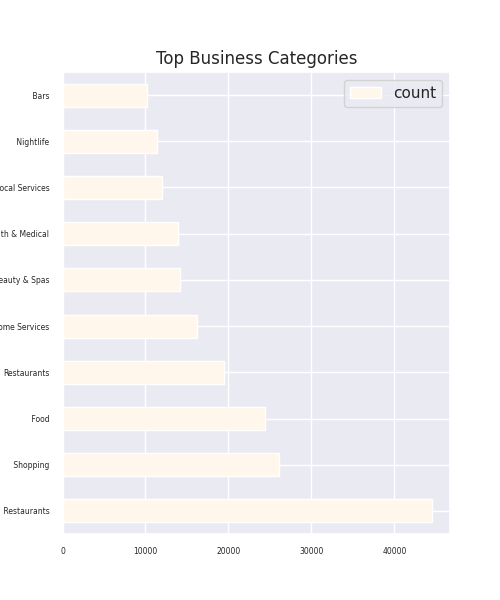

In [388]:
%matplot plt

# Do Yelp Reviews Skew Negative?
Oftentimes, it is said that the only people who write a written review are those who are extremely dissatisfied or extremely satisfied with the service received.

How true is this really? Let's try and answer this question.

Loading User Data
Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [586]:
review = spark.read.load('s3://my-little-pony/yelp/reviews.json', 
                         format='json'
                        ).select("business_id", 
                                 "stars", 
                                 "review_id", 
                                 "user_id", 
                                 "text")
business = spark.read.load('s3://my-little-pony/yelp/yelp_academic_dataset_business.json', 
                           format = 'json'
                          ).select("business_id", 
                                   "stars")
review.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['business_id', 'stars', 'review_id', 'user_id', 'text']

In [389]:
review_sub = review.select("business_id", "stars", "user_id") 
review_sub.createOrReplaceTempView("review_Bsub_avg")
review_Bsub_avg = review_sub.groupBy("business_id"
                                    ).mean("stars"
                                          ).withColumnRenamed(
    "avg(stars)", 
    "avgRating")
review_sub.createOrReplaceTempView("review_Usub_avg")
review_Usub_avg = review_sub.groupBy("user_id").mean("stars").withColumnRenamed("avg(stars)", "avgRating")

review_Bsub_avg.show(5)
review_Usub_avg.show(5)

business.createOrReplaceTempView("business_sub_avg")
business_sub_avg = spark.sql("""
SELECT business_id as BID, 
avg(stars) as TotalRating
FROM biz 
GROUP BY business_id""")
business_sub_avg.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avgRating|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vQGZjrDiDBuznOkUe...| 4.454545454545454|
|vyu1WGlnHGv2Z2MVE...|               5.0|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

+--------------------+------------------+
|             user_id|         avgRating|
+--------------------+------------------+
|KWFiZKiZBANVxuhm4...| 4.142857142857143|
|VmYpF5C3GL-7wFnvO...|               3.6|
|1Dul59QEe-Q-7OQHT...|              3.75|
|xS6kmkMXp0PRrFwkS...|3.9473684210526314|
|j56G3m8vYtA_2Io6F...|              4.25|
+--------------------+------------------+
only showing top 5 rows

+--------------------+-----------+
|                 BID|TotalRating|
+--------------------+-----------+
|M_guz7Dj7hX0evS67...|        3.5|
|oqbNgOBAxsa49c2WQ...|        3.5|
|2BKKUjLSocdlgfsMC.

In [386]:
tbl = review_Bsub_avg.join(business_sub_avg, 
                           business_sub_avg.BID == review_Bsub_avg.business_id,
                           "full"
                          ).drop('BID'
                                ).withColumnRenamed('business_id', 
                                                    'ID'
                                                   ).withColumnRenamed('avgRating', 'ReviewRating')

tbl.select("ReviewRating", "TotalRating").describe().show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+
|summary|      ReviewRating|       TotalRating|
+-------+------------------+------------------+
|  count|            209393|            209393|
|   mean| 3.534304236620265|3.5380552358483808|
| stddev|1.0152088475168215|1.0235430346225862|
|    min|               1.0|               1.0|
|    max|               5.0|               5.0|
+-------+------------------+------------------+

In [653]:
import numpy 
import scipy.stats
import matplotlib.pyplot as plt

df = tbl.toPandas()
iters == 0
g1 = numpy.array(df["ReviewRating"])
g2 = numpy.array(df["TotalRating"])
data  = (g1, g2 )

class DiffMeansPermute(HypothesisTesting): 
    
    def TestStatistic(self, data): 
        group1, group2 = data 
        test_stat = abs(group1.mean() - group2.mean())
        
        return test_stat
    
    def MakeModel(self): 
        group1, group2 = self.data 
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))
        
    def RunModel(self): 
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data 

class HypothesisTesting(object): 
    
    def __init__(self, data): 
        self.data = data 
        self.MakeModel() 
        self.actual = self.TestStatistic(numpy.array(data))
        
        self.test_stat = None 
    

    def PValue(self, iters): 
        global count 
        if iters > 0:
            self.test_stat = numpy.array(
                [self.TestStatistic(self.RunModel()
                                   ) for _ in range(iters)
                ]
            )
                       
        return sum(self.test_stat >= self.actual) / len(self.test_stat)
    
    def MaxTestStat(self):
        for _ in range(1, iters):
            pass 
        return max([self.test_stat])            
            
    def TestStatistic(self, data): 
        pass
        
    def MakeModel(self): 
        pass 
    
    def RunModel(self): 
        pass 

ht = DiffMeansPermute(data)
p_value = ht.PValue(iters = 1000)

print('\nAre Business and Reviews Average Ratings The Same or Skewed?')
print('p_value =', p_value)
print('actual =', ht.actual)
print('ts max =', max(ht.MaxTestStat()))

from numpy import *
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as p
stat = ht.test_stat
ys, xs, patches = plt.hist(stat, color='#ffff99')
x = [xs,xs]
X = abs(log10(x))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


Are Business and Reviews Average Rating The Same or Skewed?
p_value = 0.248
actual = 0.003750999228113283
ts max = 0.010952332491801275

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

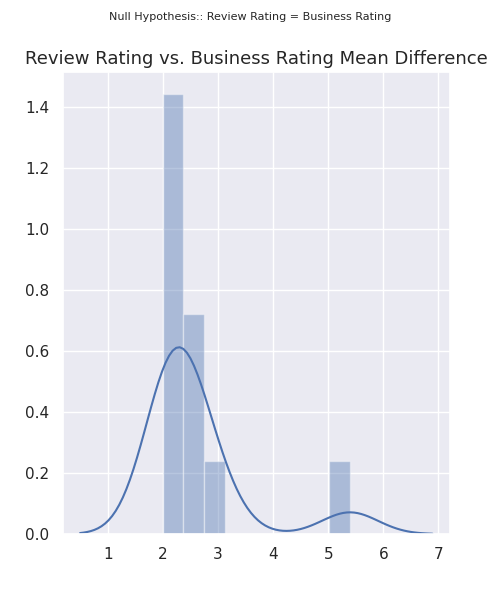

In [408]:
sns.distplot(X)
plt.title("Review Rating vs. Business Rating Mean Difference", fontsize= 13)
plt.suptitle("Null Hypothesis:: Review Rating = Business Rating", fontsize =8)
%matplot plt

In [782]:
plt.clf()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Should the Elite be Trusted? 
For the final portion - you have a choice:

Try and analyze some interesting dimension to this data. The ONLY requirement is that you must use the Users dataset and join on either the business* or reviews** dataset
Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.
Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [787]:
# import pyspark.sql.functions as f
# """"""""
# usr.createOrReplaceTempView("csv")
# query = """
# SELECT *, 
# explode(split(elite, ',')),
# elite
# FROM csv
# """
# csv =spark.sql(query)
# view = spark.read.load('s3://my-little-pony/yelp/reviews.json', format='json')

view.columns
# view.show(5)
# usr = spark.read.json("s3://my-little-pony/yelp/yelp_academic_dataset_user.json")
usr.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['name', 'ID', 'YRSelite', 'eliteSTAT']

In [634]:
# usr.createOrReplaceTempView("usr")
# query = """
# SELECT 
# name,
# user_id as ID,
# explode(split(elite, ',')),
# elite
# FROM usr"""
# usr1 = spark.sql(query).withColumnRenamed("col", "year").drop("elite")
# usr1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+----+
|    name|                  ID|year|
+--------+--------------------+----+
|  Rafael|ntlvfPzc8eglqvk92...|    |
|Michelle|FOBRPlBHa3WPHFB5q...|2008|
|Michelle|FOBRPlBHa3WPHFB5q...|2009|
|Michelle|FOBRPlBHa3WPHFB5q...|2010|
|Michelle|FOBRPlBHa3WPHFB5q...|2011|
|Michelle|FOBRPlBHa3WPHFB5q...|2012|
|Michelle|FOBRPlBHa3WPHFB5q...|2013|
|  Martin|zZUnPeh2hEp0WydbA...|2010|
|    John|QaELAmRcDc5TfJEyl...|2009|
|    Anne|xvu8G900tezTzbbfq...|2009|
|    Anne|xvu8G900tezTzbbfq...|2010|
|    Anne|xvu8G900tezTzbbfq...|2011|
|    Anne|xvu8G900tezTzbbfq...|2012|
|    Anne|xvu8G900tezTzbbfq...|2014|
|    Anne|xvu8G900tezTzbbfq...|2015|
|    Anne|xvu8G900tezTzbbfq...|2016|
|    Anne|xvu8G900tezTzbbfq...|2017|
|    Anne|xvu8G900tezTzbbfq...|2018|
|   Steve|z5_82komKV3mI4ASG...|2007|
|  Stuart|ttumcu6hWshk_EJVW...|    |
+--------+--------------------+----+
only showing top 20 rows

In [784]:
usr = usr1.groupBy("name", "ID").count().withColumnRenamed('count', 'YRSelite').sort("YRSelite", ascending=False)
usr.show(5)

usr = usr.withColumn('eliteSTAT', 
              f.when(usr.YRSelite > 1, 1).otherwise(0))
usr.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+--------+
|    name|                  ID|YRSelite|
+--------+--------------------+--------+
|  Krista|wjClsIuhEjZN2Olko...|      13|
|   David|jX52sZoojxyYV2viW...|      13|
|   Ellen|5F_ASUSCHFf3YotkK...|      13|
|     Amy|YbZg36FoMgkKcTEPa...|      13|
|   Susie|FCTEAWv-QiGr0lfva...|      13|
| Cassidy|seAX967Wk8qiVXOYj...|      13|
|   Vicky|LPTq2-fZ9_TsG5o8l...|      13|
|    Lori|5DgFmyjW6hkBtXtTM...|      13|
|     dan|m7mQf4FbNRZ6u1wrH...|      13|
|   Anita|nzsv-p1O8gCfP3Xij...|      13|
|    Matt|HYQoxBC1y1DGPq6pG...|      13|
|Jennifer|Dd6ElS2Cng3Qag_h4...|      13|
| Shannon|fyS8H0BNDv5du_X7t...|      13|
|   Sarah|8h1r7mXd-H225yDgc...|      13|
|  Cassie|2hMNc8G87MGYw4Pom...|      13|
|     Hen|JnGtgOPpkjyWOvWM0...|      13|
|  Jeremy|nkN_do3fJ9xekchVC...|      13|
|    Mary|OGa2q6LvuQLYFUG_R...|      13|
|    Lisa|LnZUtFx6qTWs8NV6l...|      13|
|    Joan|23J4vG9_xxxdnmi8C...|      13|
+--------+--------------------+--------+
only showing top

In [761]:
from pyspark.sql import functions as f
from pyspark.sql.functions import rank, sum, col 
from pyspark.sql import Window 

window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

t = usr.select(["YRSelite", "eliteSTAT"])\
            .groupBy('eliteSTAT')\
            .agg(f.count('YRSelite')\
                 .alias('Years_Num'), 
                 f.mean('YRSelite')\
                 .alias('Years_Avg'),
                 f.min('YRSelite')\
                 .alias('Years_Min'),
                 f.max('YRSelite')\
                 .alias('Years_Max'))\
.withColumn('total', sum(col('Years_Num')).over(window))\
.withColumn('Percent %', f.format_string("%5.0f%%\n", col('Years_Num')*100/col('total')))
tab = t.drop('Percent %').withColumn('Percent', col('Years_Num')*100/col('total'))
t.drop(col('total'))
t.show()
tab = tab.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------+---------+---------+-------+---------+
|eliteSTAT|Years_Num|         Years_Avg|Years_Min|Years_Max|  total|Percent %|
+---------+---------+------------------+---------+---------+-------+---------+
|        1|    57230|3.7365367814083523|        2|       13|1968703|      3%
|
|        0|  1911473|               1.0|        1|        1|1968703|     97%
|
+---------+---------+------------------+---------+---------+-------+---------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

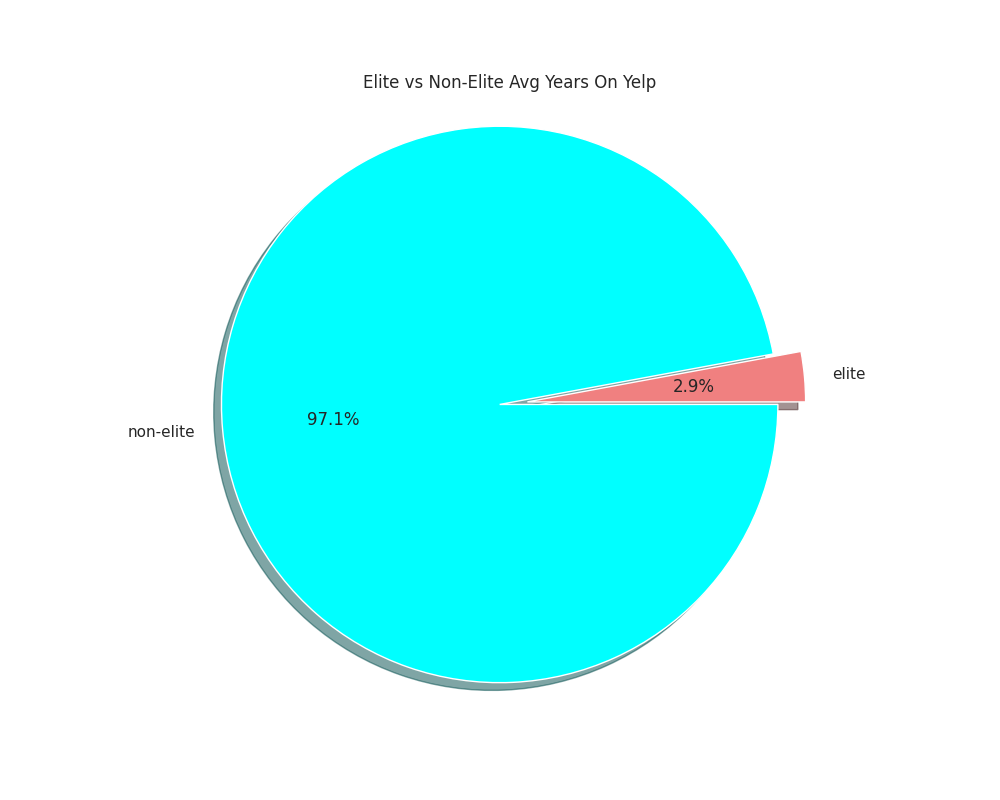

In [780]:
plot_data = pd.DataFrame(tab)
labels = plot_data.eliteSTAT
sizes = plot_data.Percent
colors = ('lightcoral', 'cyan')
explode = (0, 0.1)
plt.figure(figsize=(10, 8))

plt.pie(sizes, 
        explode=explode, 
        labels = ['elite', 'non-elite'], 
        colors = colors,
        autopct='%1.1f%%',
        shadow=True)
plt.title("Elite vs Non-Elite Avg Years On Yelp ")

plt.axis('equal')
plt.show()
%matplot plt

In [687]:
# sub = csv.select("user_id", 
#                  "fans", 
#                  "cool", 
#                  "useful", 
#                  "average_stars",
#                 "compliment_cool",
#                 "compliment_funny", 
#                 "compliment_hot",
#                 "compliment_cool", 
#                 "compliment_more",
#                 "compliment_note",
#                 "compliment_plain", 
#                 "compliment_photos",
#                 "compliment_profile")
usr.createOrReplaceTempView("us")
# us = usr.join(sub, usr.ID == sub.user_id, "full")
# us = us.withColumnRenamed('compliment_cool', 'cc')\
#        .withColumnRenamed('compliment_funny', 'cf')\
#        .withColumnRenamed('compliment_profile', 'cpr')\
#        .withColumnRenamed('compliment_note', 'cn')\
#        .withColumnRenamed('compliment_more', 'cm')\
#        .withColumnRenamed('compliment_photos', 'cph')\
#        .withColumnRenamed('compliment_plain', 'cpl')\
#        .withColumnRenamed('compliment_hot', 'ch').drop("user_id")

us.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['name', 'ID', 'YRSelite', 'eliteSTAT', 'fans', 'cool', 'useful', 'average_stars', 'cc', 'cf', 'ch', 'cc', 'cm', 'cn', 'cpl', 'cph', 'cpr']

In [789]:
view.createOrReplaceTempView("tmp2")
query = """
SELECT
user_id,
stars,
business_id,
review_id,
text, 
date 
FROM tmp2
"""
tmp2 = spark.sql(query)
tmp2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+--------------------+--------------------+-------------------+
|             user_id|stars|         business_id|           review_id|                text|               date|
+--------------------+-----+--------------------+--------------------+--------------------+-------------------+
|OwjRMXRC0KyPrIlcj...|  2.0|-MhfebM0QIsKt87iD...|xQY8N_XvtGbearJ5X...|As someone who ha...|2015-04-15 05:21:16|
|nIJD_7ZXHq-FX8byP...|  1.0|lbrU8StCq3yDfr-QM...|UmFMZ8PyXZTY2Qcwz...|I am actually hor...|2013-12-07 03:16:52|
|V34qejxNsCbcgD8C0...|  5.0|HQl28KMwrEKHqhFrr...|LG2ZaYiOgpr2DK_90...|I love Deagan's. ...|2015-12-05 03:18:11|
|ofKDkJKXSKZXu5xJN...|  1.0|5JxlZaqCnk1MnbgRi...|i6g_oA9Yf9Y31qt0w...|Dismal, lukewarm,...|2011-05-27 05:30:52|
|UgMW8bLE0QMJDCkQ1...|  4.0|IS4cv902ykd8wj1TR...|6TdNDKywdbjoTkize...|Oh happy day, fin...|2017-01-14 21:56:57|
|5vD2kmE25YBrbayKh...|  5.0|nlxHRv1zXGT0c0K51...|L2O_INwlrRuoX05KS...|This is definitel...|2013-05-07 07

In [793]:
export = tmp2.join(us, us.ID == tmp2.user_id, "full")
export.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+--------+---------+----+----+------+-------------+---+---+---+---+---+---+---+---+---+
|             user_id|stars|         business_id|           review_id|                text|               date|         name|                  ID|YRSelite|eliteSTAT|fans|cool|useful|average_stars| cc| cf| ch| cc| cm| cn|cpl|cph|cpr|
+--------------------+-----+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+--------+---------+----+----+------+-------------+---+---+---+---+---+---+---+---+---+
|-0Ji0nOyFe-4yo8BK...|  4.0|pmrHuQiy25xKB86tb...|a0r23pA6D4HDLb9P5...|They ran out of c...|2014-03-21 17:09:59|         cubs|-0Ji0nOyFe-4yo8BK...|       1|        0|   0|  20|    98|         3.12|  1|  1|  0|  1|  0|  0|  0|  0|  0|
|-0XPr1ilUAfp-yIXZ...|  2.0|QhwaGi1niDeVEHMRt...|DfAjJ3KCimOdqplv4..

In [794]:
len(export.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

23

In [796]:
sns.set(style="ticks")
df = sns.load_dataset("export")
sns.pairplot(df, hue="stars")
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

HTTP Error 404: Not Found
Traceback (most recent call last):
  File "/tmp/1589406452357-0/local/lib/python3.6/site-packages/seaborn/utils.py", line 436, in load_dataset
    urlretrieve(full_path, cache_path)
  File "/usr/lib64/python3.6/urllib/request.py", line 248, in urlretrieve
    with contextlib.closing(urlopen(url, data)) as fp:
  File "/usr/lib64/python3.6/urllib/request.py", line 223, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib64/python3.6/urllib/request.py", line 532, in open
    response = meth(req, response)
  File "/usr/lib64/python3.6/urllib/request.py", line 642, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib64/python3.6/urllib/request.py", line 570, in error
    return self._call_chain(*args)
  File "/usr/lib64/python3.6/urllib/request.py", line 504, in _call_chain
    result = func(*args)
  File "/usr/lib64/python3.6/urllib/request.py", line 650, in http_error_default
    raise HTTPError(req.full_url, code, m

In [683]:
txt = view.select("text")
lines = sc.textFile("txt")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [684]:
parts = lines.map(lambda l: l.split(","))
word = parts.map(lambda p: Row(name=p[0], age=int(p[1])))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

PythonRDD[1902] at RDD at PythonRDD.scala:53

In [493]:
q.createOrReplaceTempView("elite")
query = """
SELECT *
FROM elite
WHERE elite LIKE '%2'
"""
elite = spark.sql(query)
elite.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+------------------+------------------+------------------+-----------------+
|summary|               elite|     average_stars|      review_count|              fans|           useful|
+-------+--------------------+------------------+------------------+------------------+-----------------+
|  count|                3424|              3424|              3424|              3424|             3424|
|   mean|              2012.0|3.7646933411214953| 202.4261098130841|19.700934579439252|537.1936331775701|
| stddev|                 0.0|0.2902039125181376|220.06209870783246| 46.36594319735126|1934.837731645866|
|    min|2006,2007,2008,20...|              2.71|                 1|                 0|                0|
|    max|                2012|              4.85|              5156|              1099|            91828|
+-------+--------------------+------------------+------------------+------------------+-----------------+

In [492]:
q.explain().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'NoneType' object has no attribute 'show'
Traceback (most recent call last):
AttributeError: 'NoneType' object has no attribute 'show'

